<h1>INTRODUCCIÓN<h1>


Esta práctica se basa en el diseño de una red neuronal que distinga entre imágenes de 5 clases de **señales de tráfico** (límite de velocidad, ceda el paso, calzada con prioridad, incorporaciones y stop). Para su entrenamiento hemos descargado de kaggle un data set referido al tema, para posteriormente modificarlo en función de nuestras necesidades (dividirlo en las 5 categorías correspondientes y eliminar las clases no necesarias).

<h1>DESARROLLO<h1>

In [29]:
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



Posteriormente, procedimos a desarrollar el conjunto de entrenamiento y el conjunto de validación. Para empezar, escalamos el tamaño de la imagen a 32x32 píxeles, y cogimos el dataset en conjuntos de 32 imágenes. El primer bloque de código (train_ds) se encarga de elaborar el entrenamiento, y el segundo (val_ds) la usamos para la validación. Finalmente almacenamos temporalmente esa información obtenida en un buffer del mismo tamaño que el batch.

In [30]:
image_size = (32, 32)
batch_size = 32
path = "/Users/alvarotraviesogarcia/DataSets/Trabajo final FSI"

train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed = 3200,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
val_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed = 3200,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

Found 26832 files belonging to 5 classes.
Using 21466 files for training.
Found 26832 files belonging to 5 classes.
Using 5366 files for validation.


<h1>Primer modelo

In [31]:
model = Sequential()

model.add(Rescaling(scale=(1./127.5),
                    offset=-1, 
                    input_shape=(32, 32, 3)))
                    
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(1e-3),
              metrics=['accuracy']) 

In [32]:
epochs = 20

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3, restore_best_weights=True)

h=model.fit_generator(
        train_ds,
        epochs=epochs,
        validation_data = val_ds,
        callbacks = [es]
)

Epoch 1/20
671/671 [==============================] - 8s 12ms/step - loss: 0.2482 - accuracy: 0.9163 - val_loss: 0.0117 - val_accuracy: 0.9983
Epoch 2/20
671/671 [==============================] - 7s 11ms/step - loss: 0.0177 - accuracy: 0.9953 - val_loss: 0.0035 - val_accuracy: 0.9991
Epoch 3/20
671/671 [==============================] - 7s 11ms/step - loss: 0.0240 - accuracy: 0.9942 - val_loss: 0.0088 - val_accuracy: 0.9981
Epoch 4/20
671/671 [==============================] - 7s 11ms/step - loss: 0.0085 - accuracy: 0.9977 - val_loss: 9.2814e-04 - val_accuracy: 0.9993
Epoch 5/20
671/671 [==============================] - 7s 11ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0.0010 - val_accuracy: 0.9998
Epoch 6/20
671/671 [==============================] - 7s 11ms/step - loss: 0.0132 - accuracy: 0.9963 - val_loss: 0.0022 - val_accuracy: 0.9993
Epoch 7/20
671/671 [==============================] - 7s 10ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.0040 - val_accuracy: 0.

Posteriormente, mostramos una gráfica representativa con los resultados obtenidos.

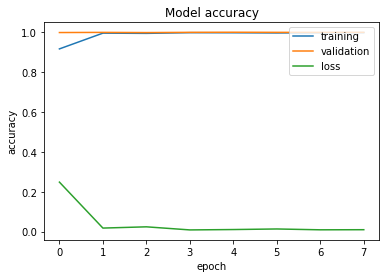

In [33]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

<h1>Segundo modelo

In [34]:
model = Sequential()

model.add(Rescaling(scale=(1./127.5),
                    offset=-1, 
                    input_shape=(32, 32, 3)))
                    
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(1e-3),
              metrics=['accuracy']) 

En un principio realizamos 20 épocas con early stopping, pero al presentar el modelo un índice de precisión tan alto desde un principio (superior al 90%) decidimos eliminar el early stopping y reducir el número de épocas a 5.

In [35]:
epochs = 5

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds
)

Epoch 1/5
671/671 [==============================] - 8s 11ms/step - loss: 0.2559 - accuracy: 0.9145 - val_loss: 0.0099 - val_accuracy: 0.9980
Epoch 2/5
671/671 [==============================] - 7s 11ms/step - loss: 0.0203 - accuracy: 0.9944 - val_loss: 0.0034 - val_accuracy: 0.9996
Epoch 3/5
671/671 [==============================] - 7s 10ms/step - loss: 0.0162 - accuracy: 0.9956 - val_loss: 0.0074 - val_accuracy: 0.9989
Epoch 4/5
671/671 [==============================] - 7s 11ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0028 - val_accuracy: 0.9989
Epoch 5/5
671/671 [==============================] - 7s 11ms/step - loss: 0.0094 - accuracy: 0.9980 - val_loss: 0.0083 - val_accuracy: 0.9981


Volvemos a realizar la gráfica.

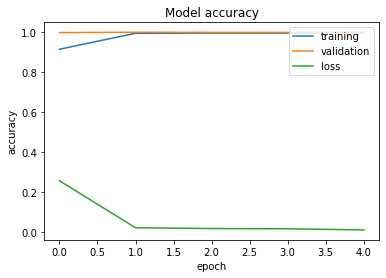

In [36]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

<h1>Tercer modelo (mejor precisión)

Eliminamos tres dropouts, una capa convolucional y un max pooling

In [37]:
model = Sequential()

model.add(Rescaling(scale=(1./127.5),
                    offset=-1, 
                    input_shape=(32, 32, 3)))
                    
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(1e-3),
              metrics=['accuracy']) 

In [41]:
epochs = 5

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds
)

Epoch 1/5
671/671 [==============================] - 6s 10ms/step - loss: 0.0126 - accuracy: 0.9974 - val_loss: 0.0154 - val_accuracy: 0.9972
Epoch 2/5
671/671 [==============================] - 6s 10ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0027 - val_accuracy: 0.9991
Epoch 3/5
671/671 [==============================] - 7s 10ms/step - loss: 2.8727e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9994
Epoch 4/5
671/671 [==============================] - 7s 10ms/step - loss: 5.1560e-05 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 0.9994
Epoch 5/5
671/671 [==============================] - 6s 9ms/step - loss: 2.6389e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9994


Para finalizar, realizamos una gráfica representativa de los resultados obtenidos y una matriz de confusión.

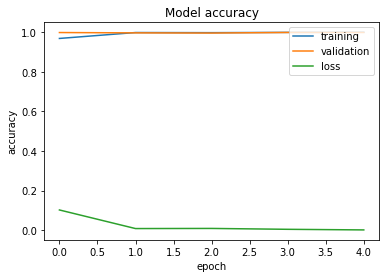

In [39]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

              precision    recall  f1-score   support

           0     0.9975    0.9963    0.9969       805
           1     0.9976    1.0000    0.9988       825
           2     0.9980    0.9980    0.9980       488
           3     1.0000    1.0000    1.0000       288
           4     0.9993    0.9990    0.9992      2960

    accuracy                         0.9987      5366
   macro avg     0.9985    0.9986    0.9986      5366
weighted avg     0.9987    0.9987    0.9987      5366



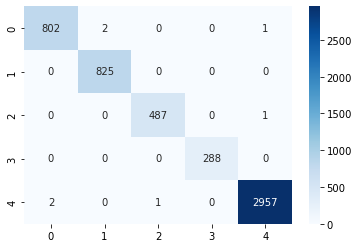

In [40]:
results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

<h1> Conclusión

Como podemos observar en el último modelo, la precisión es tendente al 100% desde la primera época (0.9974) y llegando a cumplirlo en la última, en cuanto a la pérdida vemos que empieza con apenas un 1.5%, cifra que baja hasta 0.21% en la época final. Con esto podemos concluir que el modelo identifica las distintas señales prácticamente sin ningún error.